In [2]:
# :: 5th March 2023 :: 11:26am


In [3]:
# Data Manipulation
import numpy as np
import pandas as pd 
import datetime

#Data Visualization
from pandas_profiling import ProfileReport
from fasteda import fast_eda
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.io as pio

px.defaults.template = "plotly_dark"

/tmp/ipykernel_37882/1927315201.py:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [4]:
csv_path = "datasets/linkedin-jobs-machine-learning-uk.csv"


In [5]:
df = pd.read_csv(csv_path)


In [6]:
df.head(3)


,title,company,description,onsite_remote,salary,location,criteria,posted_date,link
0,Junior Data Scientist,Oscar Technology,Role - Junior Data ScientistLocation - Manches...,onsite,NaN,"Manchester, England, United Kingdom","[{'Seniority level': 'Entry level'}, {'Employm...",2023-02-28,https://uk.linkedin.com/jobs/view/junior-data-...
1,Data Scientist (Genomics),Cambridge Epigenetix,"DescriptionPermanent/Full Time, Cambridge UKYo...",onsite,NaN,"Little Chesterford, England, United Kingdom","[{'Seniority level': 'Entry level'}, {'Employm...",2023-03-01,https://uk.linkedin.com/jobs/view/data-scienti...
2,Graduate Machine Learning / Data Scientist,Cambridge Consultants,IntroductionWe are looking for talented mathem...,onsite,NaN,"Cambridge, England, United Kingdom","[{'Seniority level': 'Entry level'}, {'Employm...",2023-02-27,https://uk.linkedin.com/jobs/view/graduate-mac...


In [7]:
df["criteria"][0]


"[{'Seniority level': 'Entry level'}, {'Employment type': 'Full-time'}, {'Job function': 'Engineering and Information Technology'}, {'Industries': 'Staffing and Recruiting'}]"

In [8]:
from ast import literal_eval

df.criteria = df.criteria.apply(literal_eval)
df = df.join(pd.json_normalize(df.criteria))

df.drop(columns=["criteria"], inplace=True)


In [9]:
df[0] = pd.json_normalize(df[0])
df[1] = pd.json_normalize(df[1])
df[2] = pd.json_normalize(df[2])
df[3] = pd.json_normalize(df[3])


In [10]:
df = df.rename(
    columns={
        0: "seniority level",
        1: "employment type",
        2: "job function",
        3: "industries",
    }
)


In [11]:
# df = df.reset_index()


In [12]:
df.tail(3)


,title,company,description,onsite_remote,salary,location,posted_date,link,seniority level,employment type,job function,industries
951,Machine Learning Engineer,CareerAddict,Nan,hybrid,NaN,"Oxford, England, United Kingdom",2023-03-01,https://uk.linkedin.com/jobs/view/machine-lear...,NaN,NaN,NaN,NaN
952,Data Scientist,COREcruitment Ltd,Nan,hybrid,"£35,000.00\n -\n £45,000.00","London, England, United Kingdom",2023-03-02,https://uk.linkedin.com/jobs/view/data-scienti...,NaN,NaN,NaN,NaN
953,Computer Vision Engineer,Kamino Consulting Ltd,Nan,hybrid,"£55,000.00\n -\n £75,000.00","Oxford, England, United Kingdom",2023-03-05,https://uk.linkedin.com/jobs/view/computer-vis...,NaN,NaN,NaN,NaN


In [13]:
df["country"] = df["location"].apply(lambda x: x.split(",")[-1])
df["city"] = df["location"].apply(lambda x: x.split(",")[0])


In [14]:
df.tail(5)


,title,company,description,onsite_remote,salary,location,posted_date,link,seniority level,employment type,job function,industries,country,city
949,Data Scientist,Peaple Talent,"Data Scientist | Bristol, Hybrid | Permanent |...",hybrid,"£40,000.00\n -\n £60,000.00","Bristol, England, United Kingdom",2023-02-28,https://uk.linkedin.com/jobs/view/data-scienti...,Mid-Senior level,Full-time,Science and Analyst,Business Consulting and Services,United Kingdom,Bristol
950,Machine Learning Engineer,Data Idols,Machine Learning EngineerData Idols are excite...,hybrid,NaN,"Birmingham, England, United Kingdom",2023-02-28,https://uk.linkedin.com/jobs/view/machine-lear...,Entry level,Full-time,Information Technology,IT Services and IT Consulting,United Kingdom,Birmingham
951,Machine Learning Engineer,CareerAddict,Nan,hybrid,NaN,"Oxford, England, United Kingdom",2023-03-01,https://uk.linkedin.com/jobs/view/machine-lear...,NaN,NaN,NaN,NaN,United Kingdom,Oxford
952,Data Scientist,COREcruitment Ltd,Nan,hybrid,"£35,000.00\n -\n £45,000.00","London, England, United Kingdom",2023-03-02,https://uk.linkedin.com/jobs/view/data-scienti...,NaN,NaN,NaN,NaN,United Kingdom,London
953,Computer Vision Engineer,Kamino Consulting Ltd,Nan,hybrid,"£55,000.00\n -\n £75,000.00","Oxford, England, United Kingdom",2023-03-05,https://uk.linkedin.com/jobs/view/computer-vis...,NaN,NaN,NaN,NaN,United Kingdom,Oxford


In [15]:
df.describe(include="all")


,title,company,description,onsite_remote,salary,location,posted_date,link,seniority level,employment type,job function,industries,country,city
count,954,954,954,954,180,954,954,954,388,388,388,388,954,954
unique,80,120,117,3,19,29,41,954,7,5,29,47,2,29
top,Data Scientist,Ivy,Nan,remote,"£35,000.00\n -\n £45,000.00","London, England, United Kingdom",2023-03-03,https://uk.linkedin.com/jobs/view/junior-data-...,Entry level,Full-time,Engineering and Information Technology,"Technology, Information and Internet",United Kingdom,London
freq,213,30,566,375,24,447,139,1,189,355,199,70,888,447


In [16]:
print(df.columns)


Index(['title', 'company', 'description', 'onsite_remote', 'salary',
       'location', 'posted_date', 'link', 'seniority level', 'employment type',
       'job function', 'industries', 'country', 'city'],
      dtype='object')


In [17]:
df.isnull().sum()


title                0
company              0
description          0
onsite_remote        0
salary             774
location             0
posted_date          0
link                 0
seniority level    566
employment type    566
job function       566
industries         566
country              0
city                 0
dtype: int64

In [18]:
df["company"].value_counts()


Ivy                  30
Exposed Solutions    26
Lifebit              26
dunnhumby            23
Peak                 21
                     ..
Kuda                  1
Dext                  1
aramco                1
Sartre Group          1
Shell                 1
Name: company, Length: 120, dtype: int64

In [19]:
df["location"].nunique()


29

In [20]:
df["onsite_remote"].value_counts()


remote    375
onsite    363
hybrid    216
Name: onsite_remote, dtype: int64

In [21]:
df.groupby("company")["posted_date"].count()


company
6point6                 10
83DATA                  15
AMBERES                  4
Abacus Careers           7
Ada Meher                9
                        ..
Xpertise Recruitment    15
ZFX                      2
aramco                   1
dunnhumby               23
orbit                   12
Name: posted_date, Length: 120, dtype: int64

In [22]:
len(df["title"].unique())


80

<AxesSubplot: >

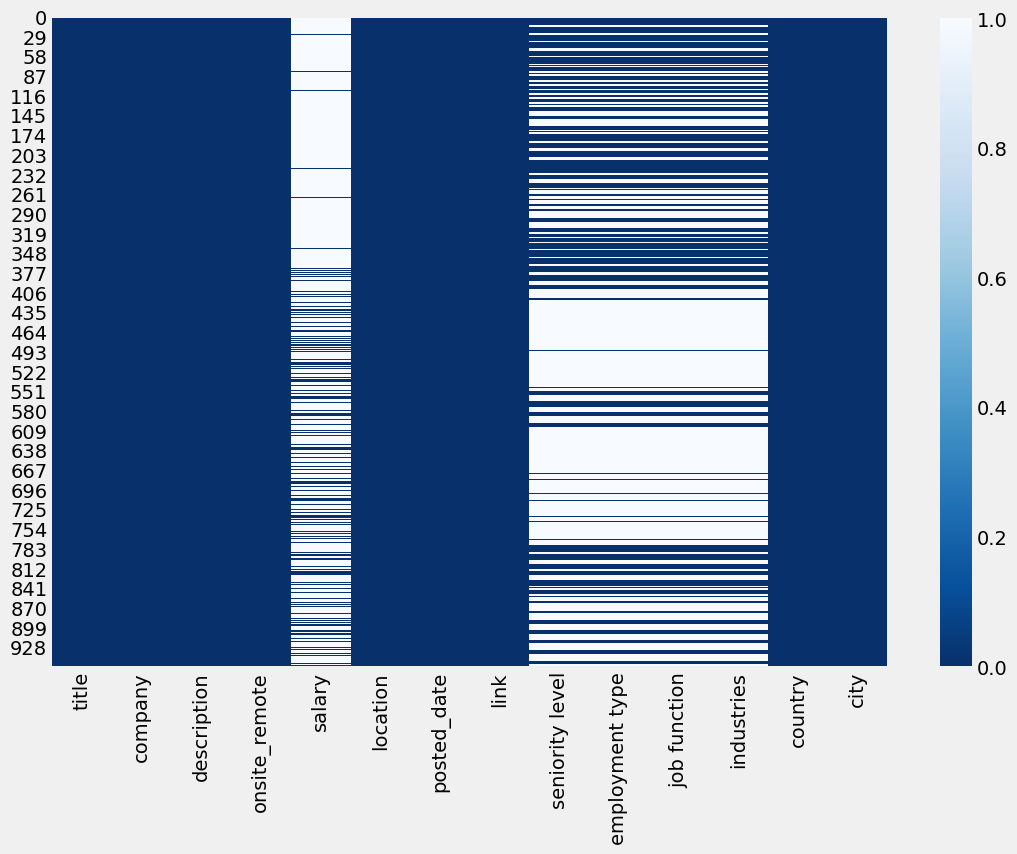

In [23]:
# Visualizing missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap="Blues_r")


In [24]:
"""# Extracting month from the date given
df["month"] = pd.DatetimeIndex(df["posted_date"]).month

# Splitting months into quarters
df["quarter"] = pd.DatetimeIndex(df["posted_date"]).quarter
"""


'# Extracting month from the date given\ndf["month"] = pd.DatetimeIndex(df["posted_date"]).month\n\n# Splitting months into quarters\ndf["quarter"] = pd.DatetimeIndex(df["posted_date"]).quarter\n'

In [25]:
"""# Extracting location, industry and functions using regular expressions
for location in df:
    df["location"] = df["location"].str.extract("([A-Za-z]+)\,", expand=False)

for industries in df:
    df["industries"] = df["industries"].str.extract("([A-Za-z]+)'", expand=False)

for function in df:
    df["job function"] = df["job function"].str.extract("([A-Za-z]+)']", expand=False)"""


'# Extracting location, industry and functions using regular expressions\nfor location in df:\n    df["location"] = df["location"].str.extract("([A-Za-z]+)\\,", expand=False)\n\nfor industries in df:\n    df["industries"] = df["industries"].str.extract("([A-Za-z]+)\'", expand=False)\n\nfor function in df:\n    df["job function"] = df["job function"].str.extract("([A-Za-z]+)\']", expand=False)'

In [26]:
# Assuming that null location values are remote df
df["location"].fillna(value="remote", inplace=True)


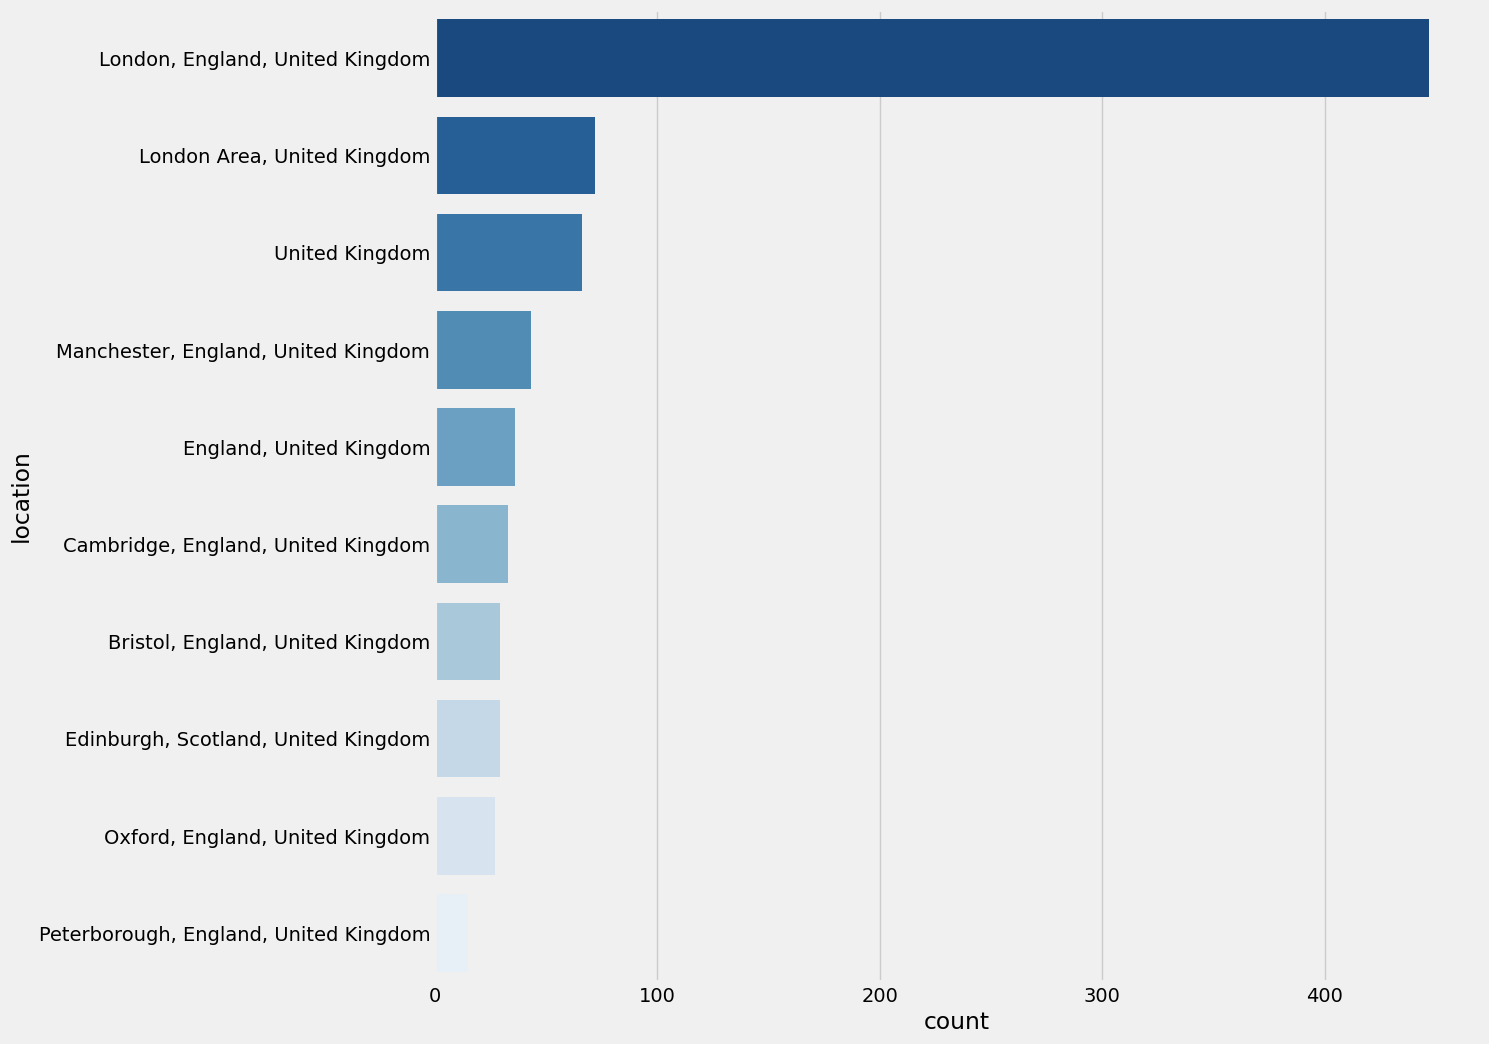

In [27]:
# Count of the most common jobs posting by location, splitting them based on the level of jobs
plt.figure(figsize=(12, 12))
sns.countplot(
    y="location",
    data=df,
    palette="Blues_r",
    order=df["location"].value_counts().nlargest(10).index,
)
plt.show()


<AxesSubplot: ylabel='onsite_remote'>

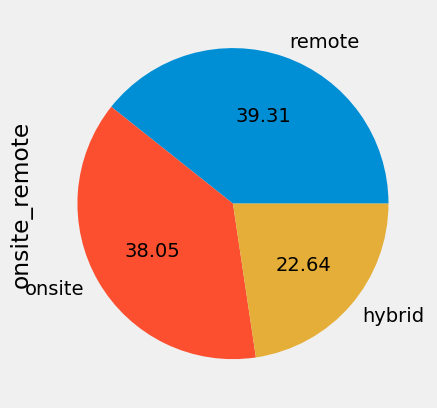

In [28]:
df["onsite_remote"].value_counts().plot(kind="pie", autopct="%.2f")


/tmp/ipykernel_37882/2433597558.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


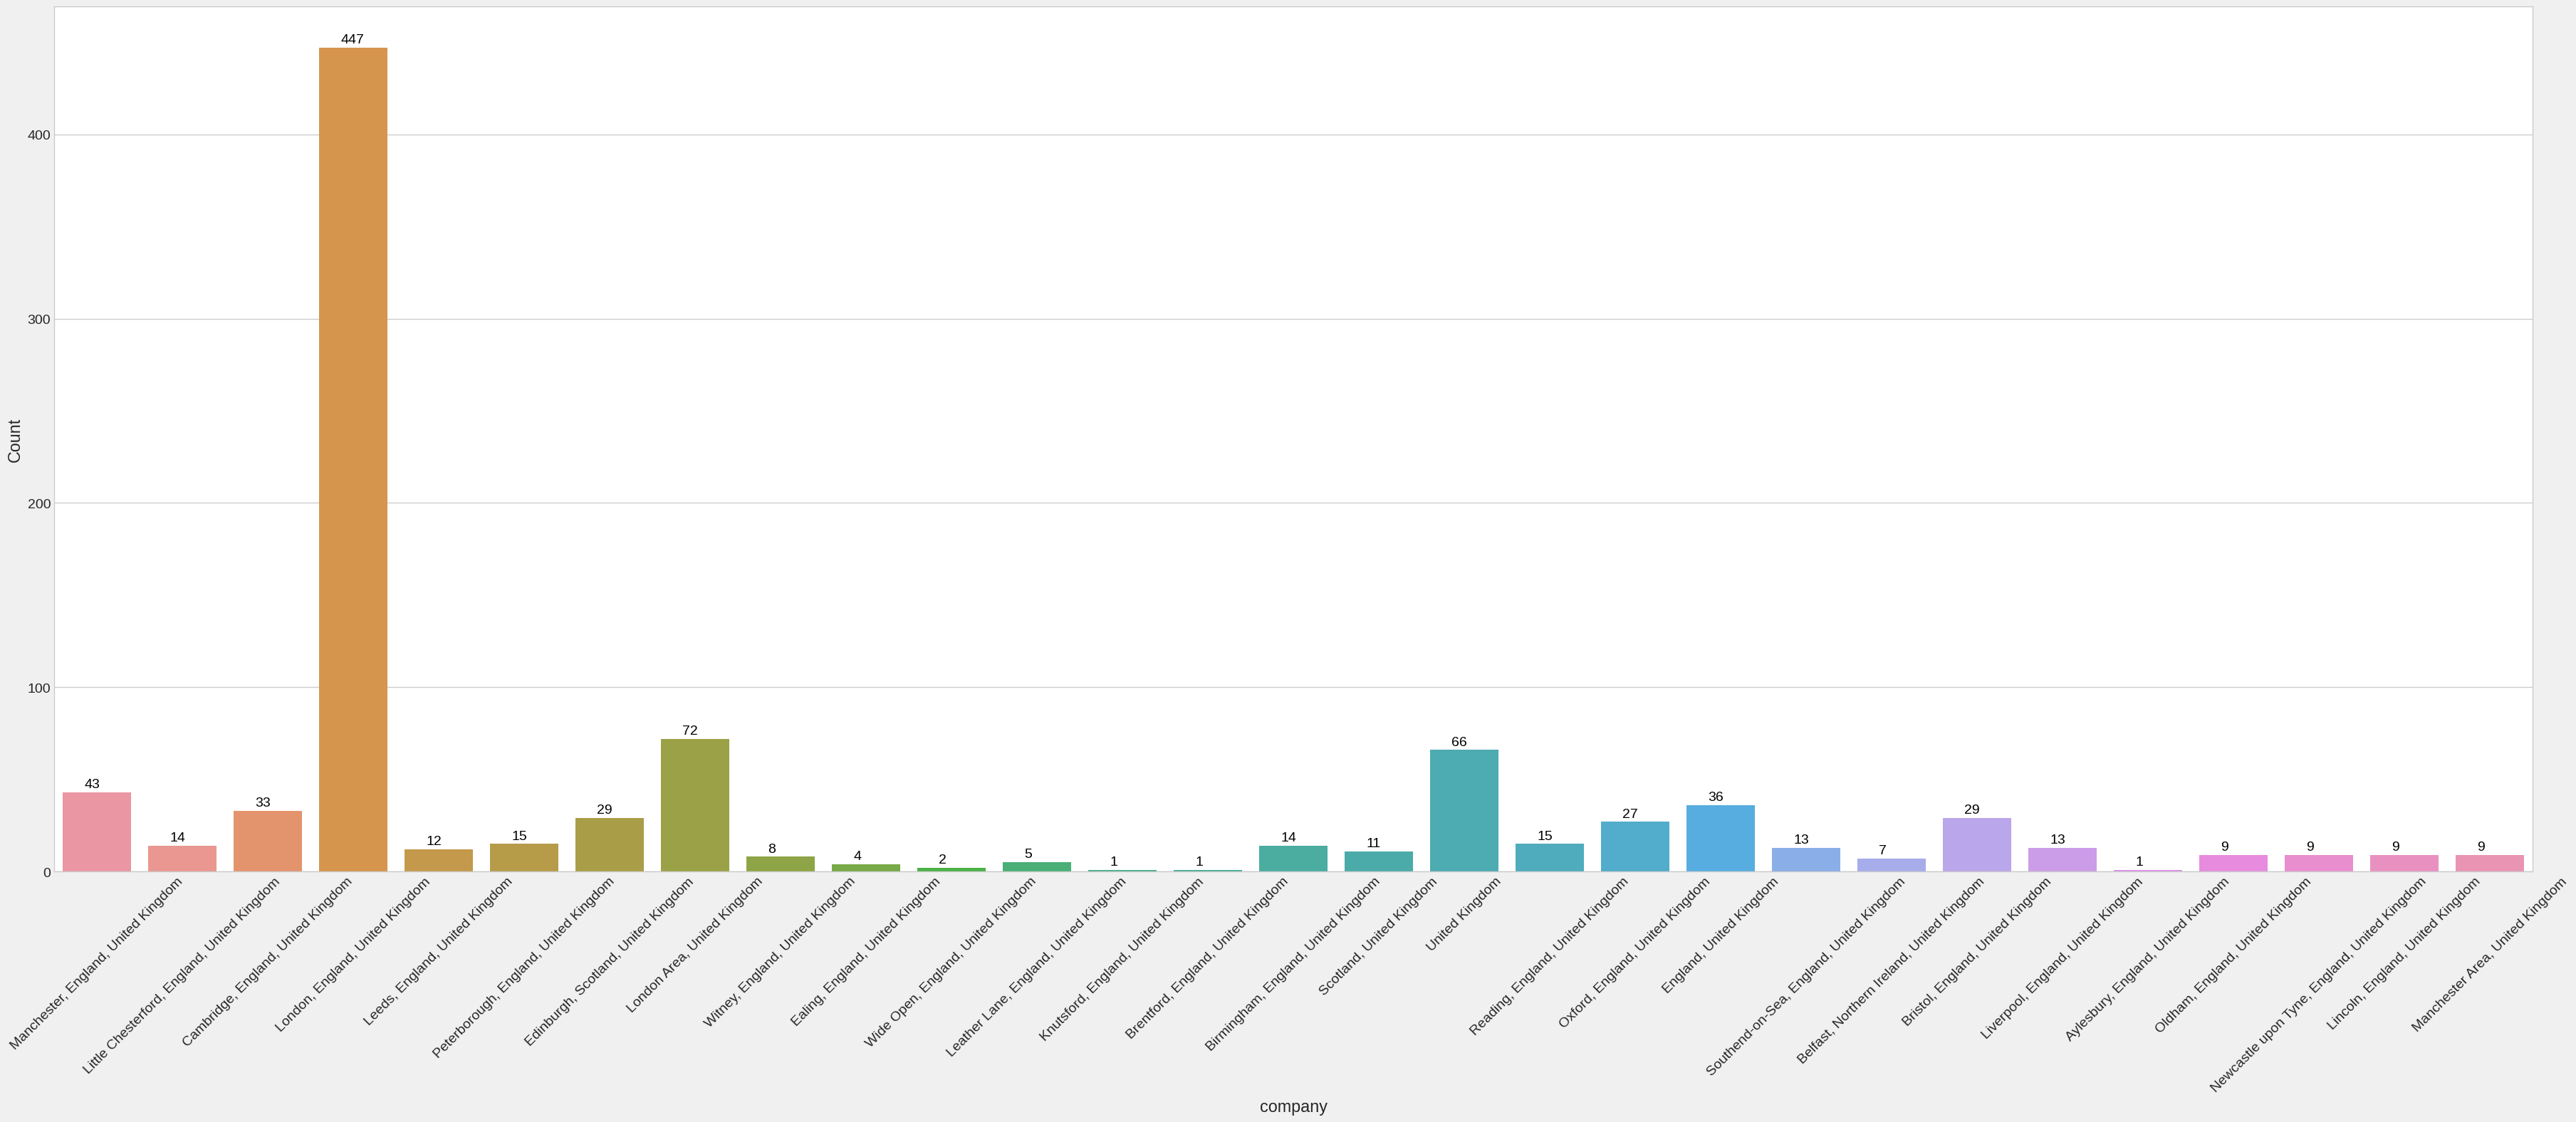

In [29]:
plt.figure(figsize=(40, 15))
plt.style.use("seaborn-whitegrid")
ax = sns.countplot(x="location", data=df)
plt.xlabel("company")
plt.ylabel("Count")
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(
        int(p.get_height()),
        (p.get_x() + 0.25, p.get_height() + 1),
        va="bottom",
        color="black",
    )


/tmp/ipykernel_37882/2842886186.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


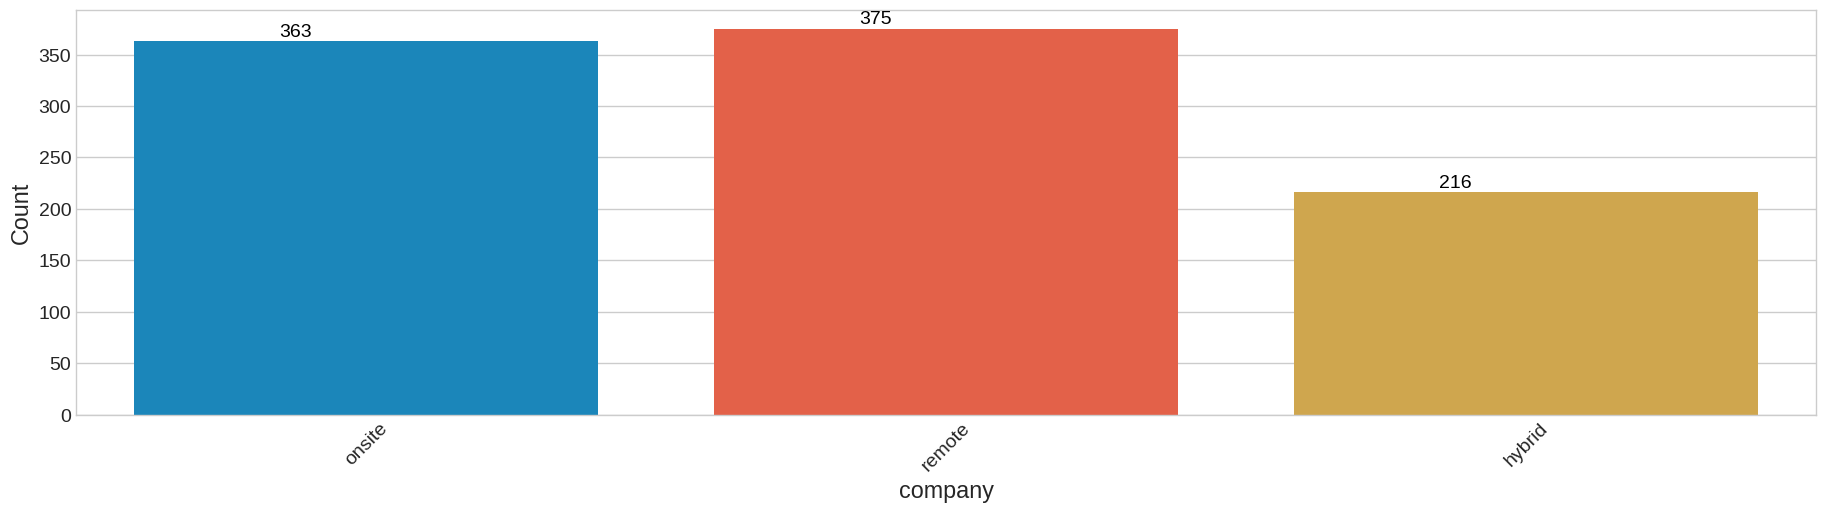

In [30]:
plt.figure(figsize=(20, 5))
plt.style.use("seaborn-whitegrid")
ax = sns.countplot(x="onsite_remote", data=df)
plt.xlabel("company")
plt.ylabel("Count")
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(
        int(p.get_height()),
        (p.get_x() + 0.25, p.get_height() + 1),
        va="bottom",
        color="black",
    )


Text(0.5, 0, 'Count')

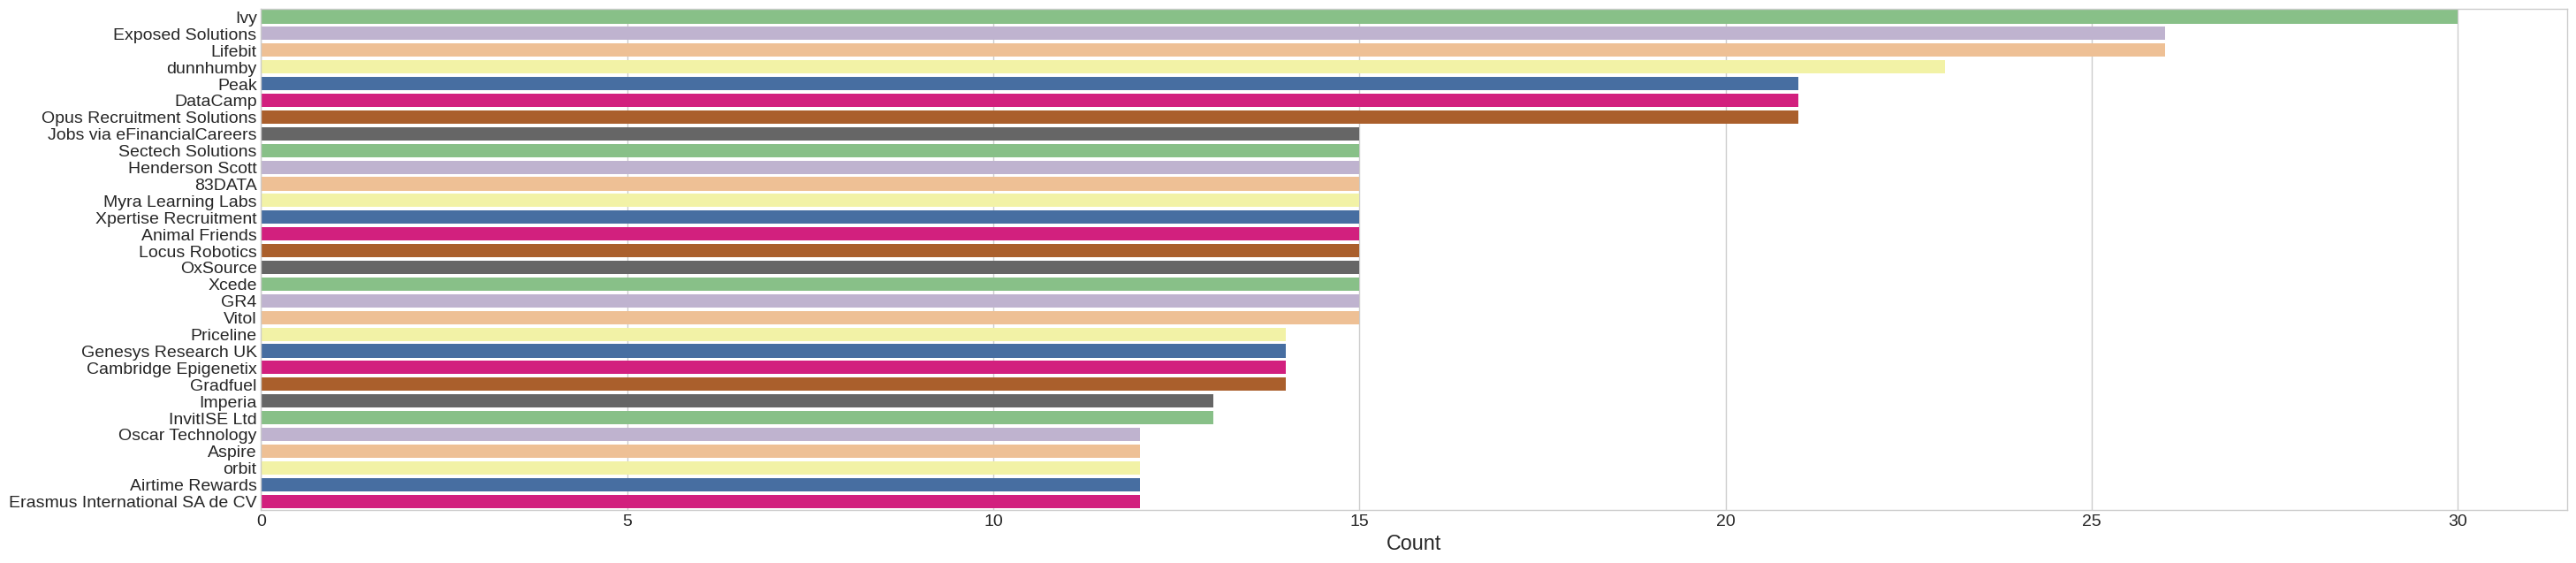

In [31]:
plt.figure(figsize=(30, 7))
company = df["company"].value_counts()[:30]
sns.barplot(x=company, y=company.index, palette="Accent")
plt.xlabel("Count")


Text(0.5, 0, 'Count')

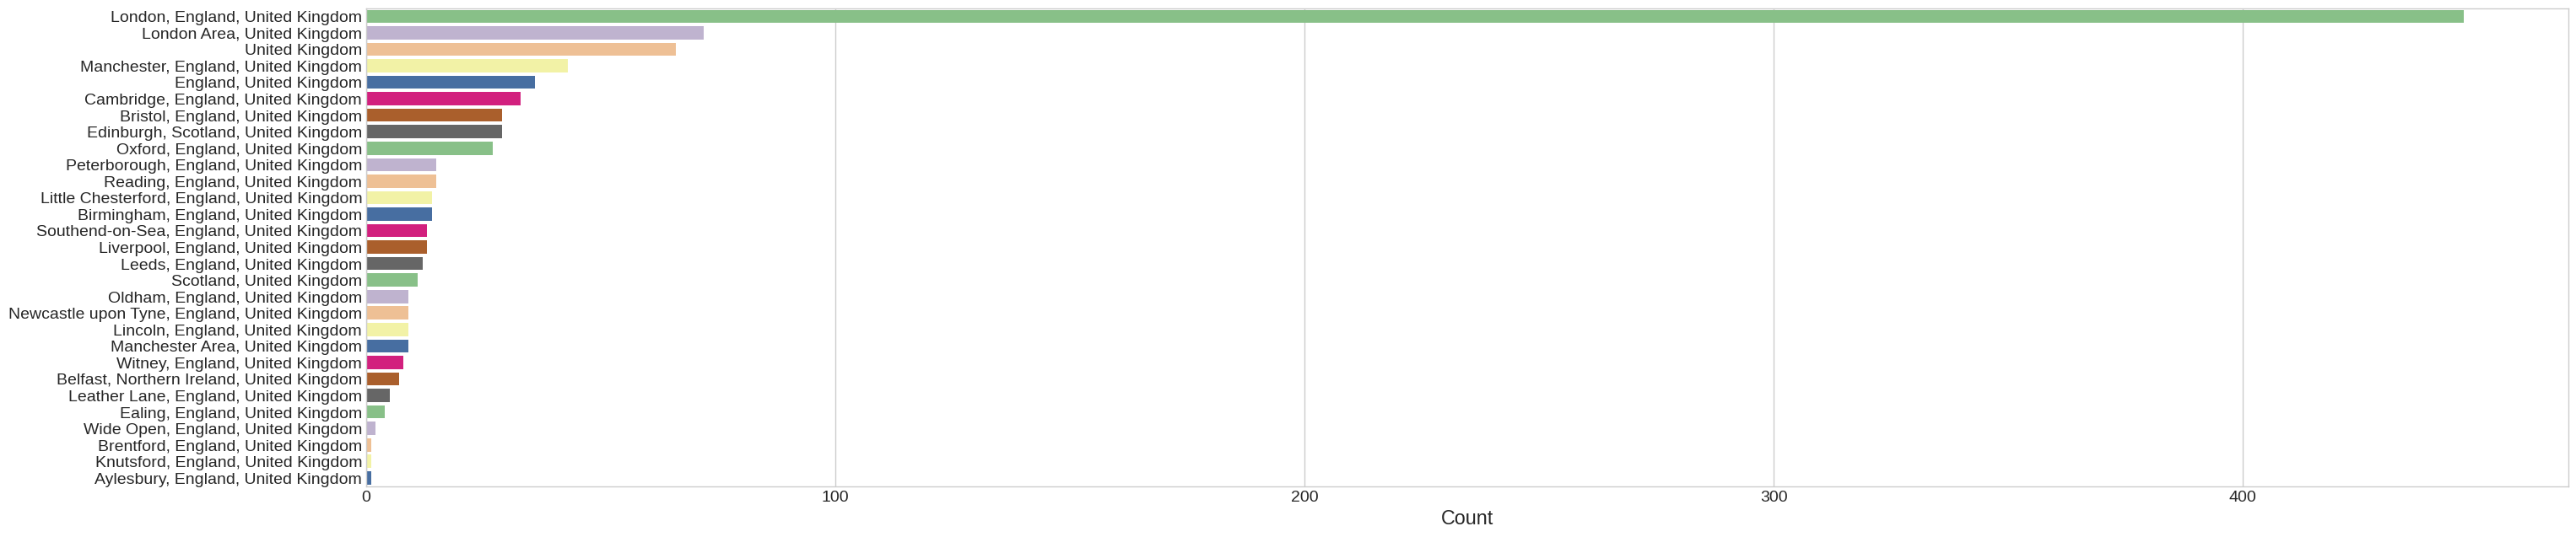

In [32]:
plt.figure(figsize=(30, 7))
location = df["location"].value_counts()[:30]
sns.barplot(x=location, y=location.index, palette="Accent")
plt.xlabel("Count")


Text(0.5, 0, 'Count')

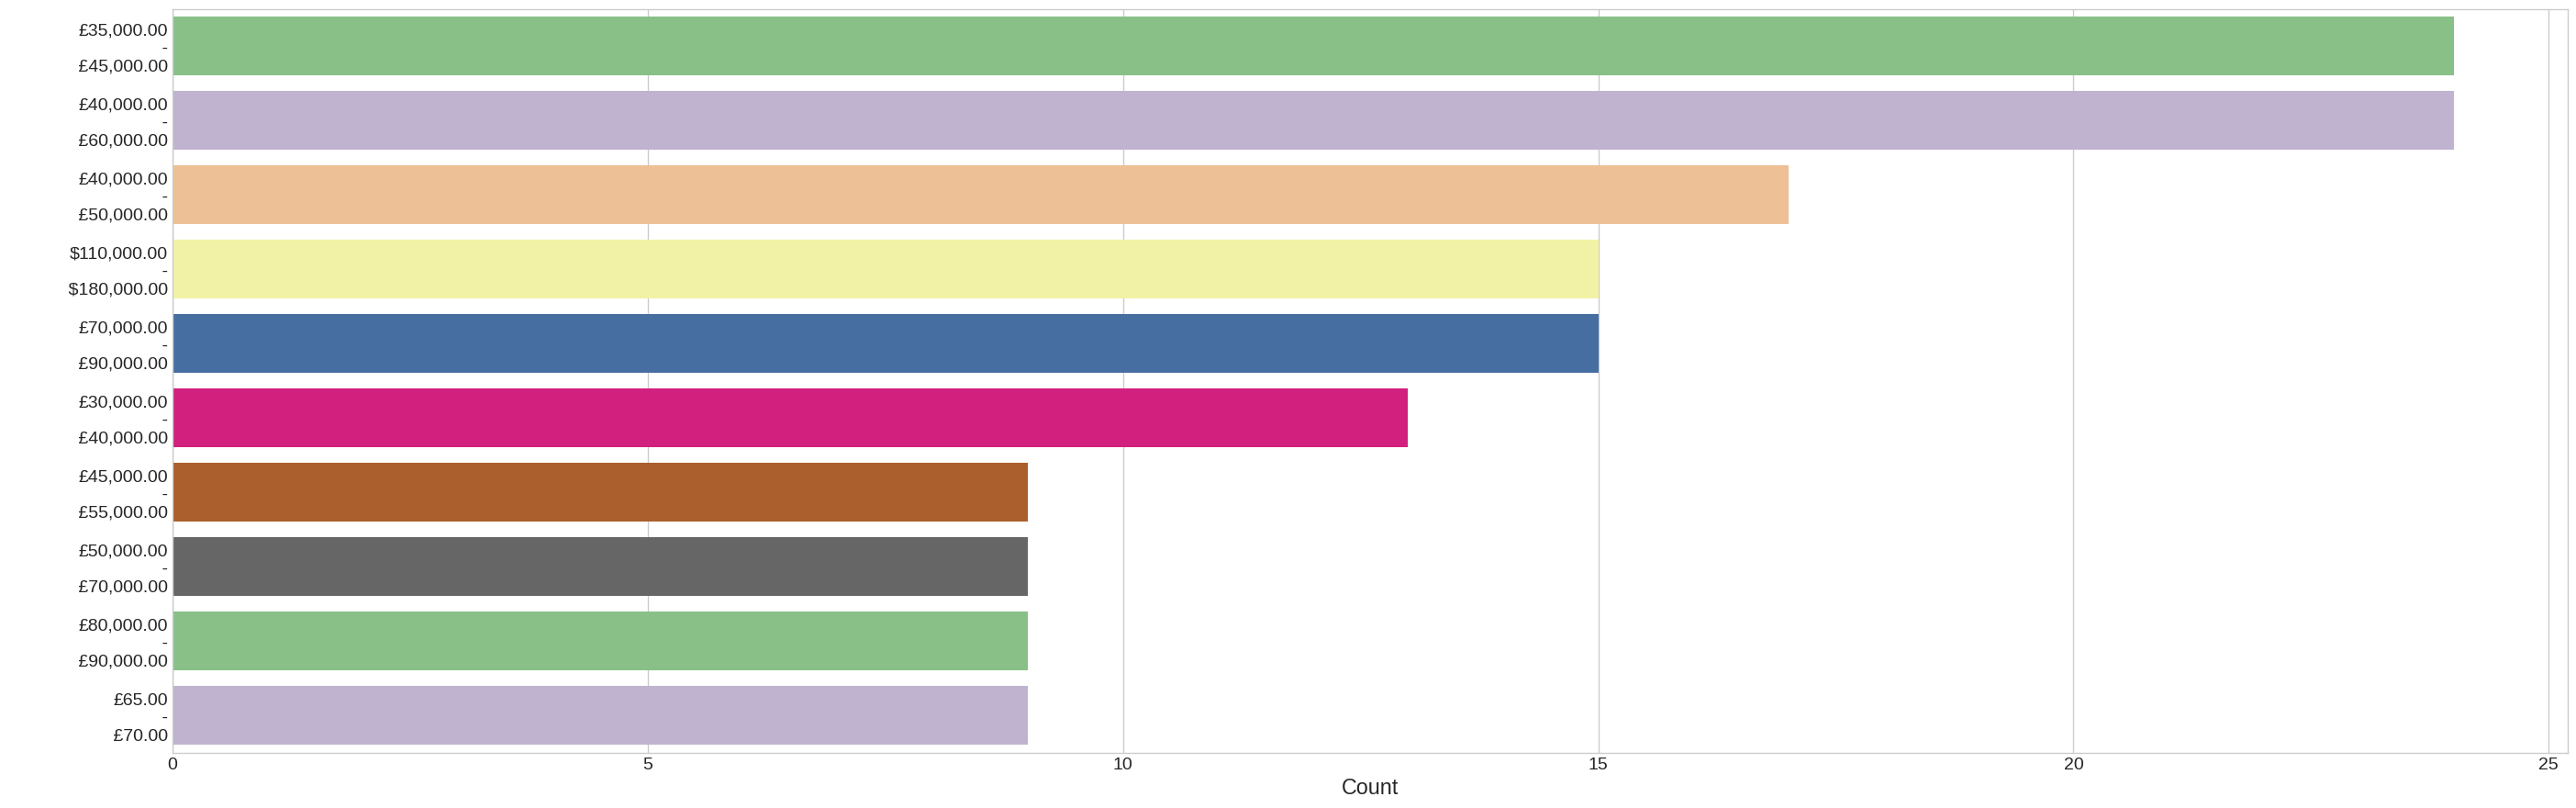

In [33]:
plt.figure(figsize=(30, 10))
salary = df["salary"].value_counts()[:10]
sns.barplot(x=salary, y=salary.index, palette="Accent")
plt.xlabel("Count")


In [34]:
#create the profile object
df_report = ProfileReport(df, title='LinkedIn Jobs UK',html={'style':{'full_width':True}},sort=None)

In [35]:
df_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [36]:
"""analysis = fast_eda(df)

from dataprep.eda import create_report
report = create_report(df)"""


'analysis = fast_eda(df)\n\nfrom dataprep.eda import create_report\nreport = create_report(df)'

In [37]:


job_types = df['title'].value_counts()
px.pie(df, values = job_types.values, names = job_types.index,
       title = 'No. of Job Postings by Job_Type',
      color_discrete_sequence = px.colors.qualitative.Pastel)